In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [31]:
df=pd.read_csv('AB_NYC_2019.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [34]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

class DataPreprocessing:
    def __init__(self, df):
        self.df = df.copy() 
        self.encoder = LabelEncoder()
        self.scaler = StandardScaler()

    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
                else:
                    self.df[col] = self.df[col].fillna(self.df[col].mean())
        return self

    def encodla(self):
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                if self.df[col].nunique() <= 6:
                    dummies = pd.get_dummies(self.df[col], prefix=col, dtype=int)
                    self.df = pd.concat([self.df.drop(columns=[col]), dummies], axis=1)
                else:
                    self.df[col] = self.encoder.fit_transform(self.df[col])
        return self

    def scaling_qil(self):
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        self.df[numeric_cols] = self.scaler.fit_transform(self.df[numeric_cols])
        return self
    
    
    def get_df(self):
        return self.df

In [35]:
preprocessor = DataPreprocessing(df)
df = preprocessor.tozala().encodla().scaling_qil().get_df()

In [36]:
df.head()

id      name   host_id  host_name  neighbourhood  latitude  \
0 -1.731277 -0.842362 -0.860159  -0.134876       0.012762 -1.493849   
1 -1.731272  0.977282 -0.860158  -0.198077       0.289156  0.452436   
2 -1.731176  1.418162 -0.860135  -0.779272      -0.190897  1.468399   
3 -1.731159 -0.664576 -0.860132   0.241228      -0.961892 -0.803398   
4 -1.731051 -0.381422 -0.860103   0.154482      -0.670950  1.275660   

   longitude     price  minimum_nights  number_of_reviews  ...  \
0  -0.437652 -0.015493       -0.293996          -0.320414  ...   
1  -0.684639  0.300974       -0.293996           0.487665  ...   
2   0.222497 -0.011329       -0.196484          -0.522433  ...   
3  -0.164450 -0.265335       -0.293996           5.538156  ...   
4   0.177216 -0.302811        0.144807          -0.320414  ...   

   calculated_host_listings_count  availability_365  \
0                       -0.034716          1.916250   
1                       -0.156104          1.840275   
2                       -0.186451          1.916250   
3                       -0.186451          0.617065   
4                       -0.186451         -0.856865   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                  -0.151071                      1.196705   
1                  -0.151071                     -0.835628   
2                  -0.151071                     -0.835628   
3                  -0.151071                      1.196705   
4                  -0.151071                     -0.835628   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                      -0.891833                   -0.362035   
1                       1.121286                   -0.362035   
2                       1.121286                   -0.362035   
3                      -0.891833                   -0.362035   
4                       1.121286                   -0.362035   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                          -0.087677                  -1.040134   
1                          -0.087677                   0.961415   
2                          -0.087677                  -1.040134   
3                          -0.087677                   0.961415   
4                          -0.087677                   0.961415   

   room_type_Private room  room_type_Shared room  
0                1.090893              -0.155887  
1               -0.916680              -0.155887  
2                1.090893              -0.155887  
3               -0.916680              -0.155887  
4               -0.916680              -0.155887  

[5 rows x 22 columns]

In [37]:
x=df.iloc[:,[3,4]].values

In [38]:
x

array([[-0.13487628,  0.01276167],
       [-0.19807666,  0.28915589],
       [-0.77927228, -0.19089723],
       ...,
       [-0.35979527, -0.19089723],
       [ 1.47642353, -0.17635016],
       [-1.07079951, -0.17635016]], shape=(48895, 2))

In [39]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

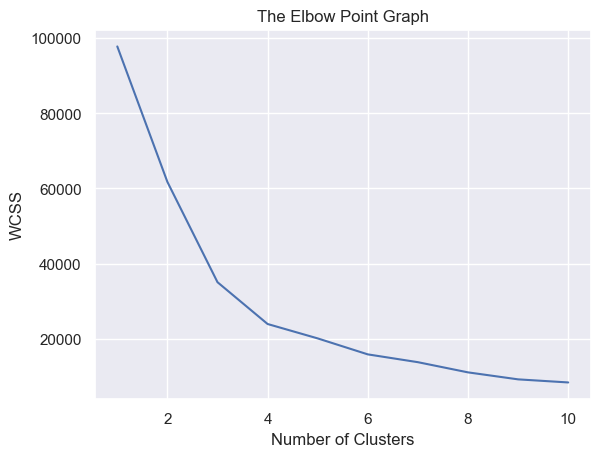

In [40]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score

for k in [3, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=3: 0.422
Silhouette Score for k=5: 0.388


In [42]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)


y = kmeans.fit_predict(x)

In [45]:
print(y)

[0 0 0 ... 0 1 0]


In [46]:
y

array([0, 0, 0, ..., 0, 1, 0], shape=(48895,), dtype=int32)

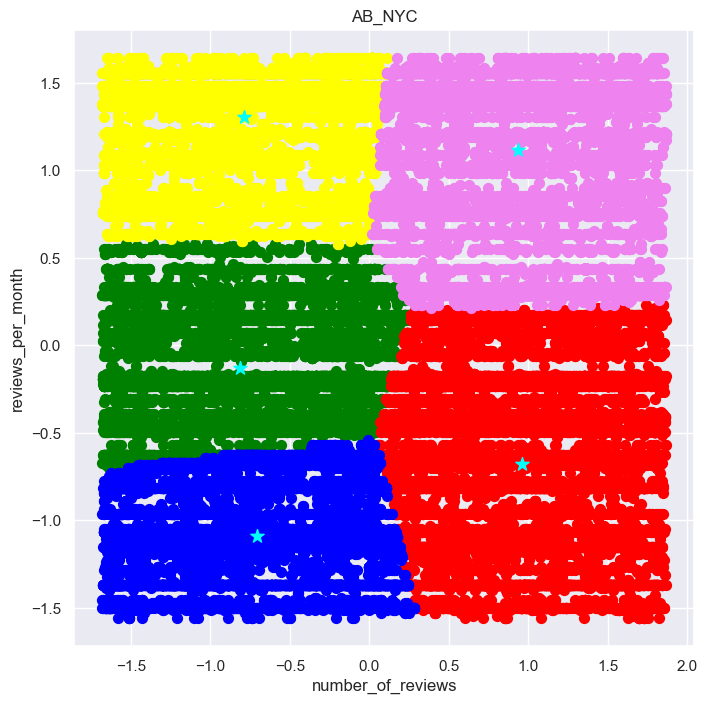

In [47]:

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids',marker='*')

plt.title('AB_NYC')
plt.xlabel('number_of_reviews')
plt.ylabel('reviews_per_month')
plt.show()

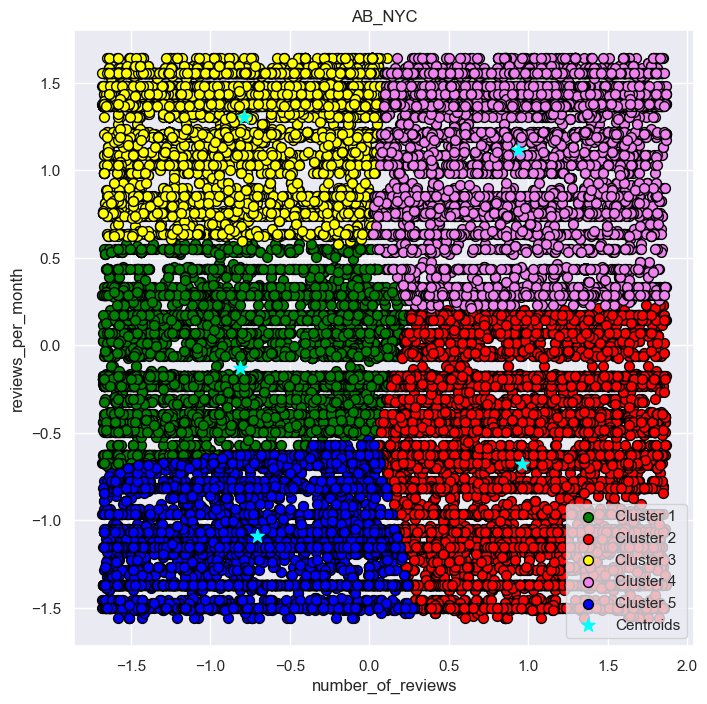

In [48]:
plt.figure(figsize=(8,8))

plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1', edgecolor='black', marker='o', linewidth=1)
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2', edgecolor='black', marker='o', linewidth=1)
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3', edgecolor='black', marker='o', linewidth=1)
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4', edgecolor='black', marker='o', linewidth=1)
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5', edgecolor='black', marker='o', linewidth=1)


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids', marker='*')

plt.title('AB_NYC')
plt.xlabel('number_of_reviews')
plt.ylabel('reviews_per_month')
plt.legend()
plt.show()


In [ ]:
df['Cluster'] = y

cluster_names = {
    0: 'Medium Income, Medium Spending',
    1: 'High Income, High Spending',
    2: 'High Income, Low Spending'    
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)

In [51]:
for idx, row in df.iterrows():
    print(f"id {row['id']} belongs to Cluster {row['Cluster'] + 1} ({row['Cluster Name']})")

id -1.7312766126675947 belongs to Cluster 1 (Medium Income, Medium Spending)
id -1.7312715138767334 belongs to Cluster 1 (Medium Income, Medium Spending)
id -1.7311757294484118 belongs to Cluster 1 (Medium Income, Medium Spending)
id -1.7311589762784392 belongs to Cluster 2 (High Income, High Spending)
id -1.731050535922801 belongs to Cluster 2 (High Income, High Spending)
id -1.7310435250853669 belongs to Cluster 1 (Medium Income, Medium Spending)
id -1.7310415219889572 belongs to Cluster 5 (Low Income, High Spending)
id -1.7310363321482591 belongs to Cluster 2 (High Income, High Spending)
id -1.731034055902339 belongs to Cluster 4 (Low Income, Low Spending)
id -1.7310308691580507 belongs to Cluster 5 (Low Income, High Spending)
id -1.7310256793173526 belongs to Cluster 4 (Low Income, Low Spending)
id -1.7310123860411786 belongs to Cluster 1 (Medium Income, Medium Spending)
id -1.7309794260002542 belongs to Cluster 4 (Low Income, Low Spending)
id -1.7309595771358302 belongs to Cluster

In [52]:
print(df[['id', 'number_of_reviews', 'price', 'Cluster', 'Cluster Name']].head(10))

         id  number_of_reviews     price  Cluster  \
0 -1.731277          -0.320414 -0.015493        0   
1 -1.731272           0.487665  0.300974        0   
2 -1.731176          -0.522433 -0.011329        0   
3 -1.731159           5.538156 -0.265335        1   
4 -1.731051          -0.320414 -0.302811        1   
5 -1.731044           1.138617  0.196873        0   
6 -1.731042           0.577451 -0.386092        4   
7 -1.731036           9.129616 -0.306975        1   
8 -1.731034           2.126269 -0.306975        3   
9 -1.731031           3.069027 -0.011329        4   

                     Cluster Name  
0  Medium Income, Medium Spending  
1  Medium Income, Medium Spending  
2  Medium Income, Medium Spending  
3      High Income, High Spending  
4      High Income, High Spending  
5  Medium Income, Medium Spending  
6       Low Income, High Spending  
7      High Income, High Spending  
8        Low Income, Low Spending  
9       Low Income, High Spending  


In [54]:
for cluster_num in range(5):
    cluster_df = df[df['Cluster'] == cluster_num]
    filename = f'cluster_{cluster_num + 1}_customers.csv' 
    cluster_df.to_csv(filename, index=False)
    print(f'Saved {filename} with {len(cluster_df)} records.')

Saved cluster_1_customers.csv with 9563 records.
Saved cluster_2_customers.csv with 13457 records.
Saved cluster_3_customers.csv with 8273 records.
Saved cluster_4_customers.csv with 8458 records.
Saved cluster_5_customers.csv with 9144 records.
